# Zeitepochen im langen 19ten Jahrhundert


Eric Hobsbawm :

das Zeitalter der Revolution (1789–1848)

das Zeitalter des Kapitals (1848–1875) 

das Zeitalter des Imperiums (1875–1914)

[3] Reinhart Koselleck prägte den Begriff der Sattelzeit, die etwa von 1770 bis 1830 gedauert habe.

In [1]:
import sys
sys.path.append('../lib')
sys.path.append('../src')
sys.path.append('../src/queries')
sys.path.append('../src/clustering')
sys.path.append('../data')
sys.path.append('../')

%matplotlib inline

from lib import csv_reader as reader
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

from lib import year_classifier as year_classifier

from jinja2 import Environment, FileSystemLoader

In [16]:
# matrix
from itertools import chain, combinations
def frequency_matrix(start, end):
    dimensions =    110 
    matrix = np.zeros(shape=(dimensions,dimensions), dtype=np.int)

    clusters = df.query('mid_year >= {0} & mid_year <= {1}'.format(start, end))

    cluster_list = clusters.groupby('picture_id')['cluster_id'].apply(list)
    cluster_list = np.array(cluster_list)
    for transaction in cluster_list:
        for z in chain.from_iterable(combinations(transaction, r) for r in range(len(transaction)+1)):
            if(len(z) == 2):
                i, j = z
                matrix[i, j] += 1
                matrix[j, i] += 1
    return matrix


#load Data!!!
import db

my_db = db.Db()
df = my_db.final_cluster_nation

time_ranges = [[1789,1847], [1848,1874], [1875,1914], [1789,1914]]

# nicht das gleiche ergebnis, da zeitraum kleiner
#df['mid_year'].max() = 1918

Db initialized, data is now accessible. It took  0.67s reading all files


In [3]:
df

,picture_id,mid_year,cluster_id,cluster_rank,metadata_country,picture_title,cluster_name
0,24,1859,37,1,Germany,Ansprache Friedrichs II. an seine Generäle vor...,"Winter, Schnee"
1,24,1859,55,4,Germany,Ansprache Friedrichs II. an seine Generäle vor...,"Maennergruppe, Herren"
2,24,1859,62,2,Germany,Ansprache Friedrichs II. an seine Generäle vor...,"Krieg, Schlacht, Soldaten"
3,24,1859,103,3,Germany,Ansprache Friedrichs II. an seine Generäle vor...,"Portrait mit Mantel, Pelz, Umhang"
4,25,1849,57,4,Germany,Die Bittschrift,"Weg, Strasse, Pfad"
5,25,1849,21,2,Germany,Die Bittschrift,"Uniform, Militaer"
6,25,1849,16,3,Germany,Die Bittschrift,"Pferde, Kutsche"
7,25,1849,78,1,Germany,Die Bittschrift,Reiter
8,41,1801,21,1,France,Bonaparte franchissant les Alpes au Grand-Sain...,"Uniform, Militaer"
9,41,1801,6,3,France,Bonaparte franchissant les Alpes au Grand-Sain...,Pferd


In [4]:
aa = df.query('mid_year >= 1789 & mid_year <= 1914')[['metadata_country', 'picture_id']].groupby('metadata_country').count()

aa.sort_values('picture_id', ascending=False)/4

,picture_id
metadata_country,
Germany,5085.0
France,3781.0
Britain,1600.0
Austria,801.0
USA,669.0
Italy,581.0
Switzerland,410.0
Netherlands,288.0
Japan,246.0


In [25]:
aa = df.query('mid_year >= 1789 & mid_year <= 1914')

#aa = aa[aa['cluster_id']== 107]
aa = aa[['metadata_country', 'picture_id']].groupby('metadata_country').count()

aa.sort_values('picture_id', ascending=False)/4

,picture_id
metadata_country,
Germany,5085.0
France,3781.0
Britain,1600.0
Austria,801.0
USA,669.0
Italy,581.0
Switzerland,410.0
Netherlands,288.0
Japan,246.0


In [14]:
# tops pro land und zeitraum

b_df = df[df['metadata_country']=='Germany']
#b_df[b_df['mid_year'] >=]
b_df = b_df.query('mid_year >= 1848 & mid_year <= 1875')

#print len(b_df)/4

b_df2 = b_df.groupby('cluster_id').count()['picture_id'].reset_index(name="count").sort_values('count', ascending=False)

#b_df2['count'].sum()
#712

b_df2['per'] = b_df2['count']/178/4

#b_df2['per'].sum()
b_df2

,cluster_id,count,per
2,2,159,0.223315
15,15,106,0.148876
37,39,106,0.148876
5,5,103,0.144663
48,50,89,0.125000
26,27,89,0.125000
0,0,88,0.123596
104,107,85,0.119382
57,60,83,0.116573
31,32,82,0.115169


In [5]:
time_range_matrices = []

for x in time_ranges:
    mat = frequency_matrix(x[0], x[1])
    #time_range_matrices.append(pd.DataFrame(mat))
    time_range_matrices.append(mat)
    
time_range_matrices
#pd.DataFrame(time_range_matrices[0])

[array([[ 0,  2,  5, ...,  1,  2, 78],
        [ 2,  0,  0, ..., 28,  0,  0],
        [ 5,  0,  0, ..., 58,  0,  2],
        ..., 
        [ 1, 28, 58, ...,  0,  7,  4],
        [ 2,  0,  0, ...,  7,  0,  3],
        [78,  0,  2, ...,  4,  3,  0]]), array([[ 0,  1,  2, ...,  2,  2, 22],
        [ 1,  0,  0, ..., 86,  3,  1],
        [ 2,  0,  0, ..., 42,  0,  2],
        ..., 
        [ 2, 86, 42, ...,  0, 14, 10],
        [ 2,  3,  0, ..., 14,  0,  1],
        [22,  1,  2, ..., 10,  1,  0]]), array([[ 0,  0,  5, ...,  3,  1, 20],
        [ 0,  0,  2, ..., 31,  0,  0],
        [ 5,  2,  0, ..., 52,  2,  4],
        ..., 
        [ 3, 31, 52, ...,  0, 15,  7],
        [ 1,  0,  2, ..., 15,  0,  5],
        [20,  0,  4, ...,  7,  5,  0]]), array([[  0,   3,  12, ...,   6,   5, 120],
        [  3,   0,   2, ..., 145,   3,   1],
        [ 12,   2,   0, ..., 152,   2,   8],
        ..., 
        [  6, 145, 152, ...,   0,  36,  21],
        [  5,   3,   2, ...,  36,   0,   9],
        [120, 

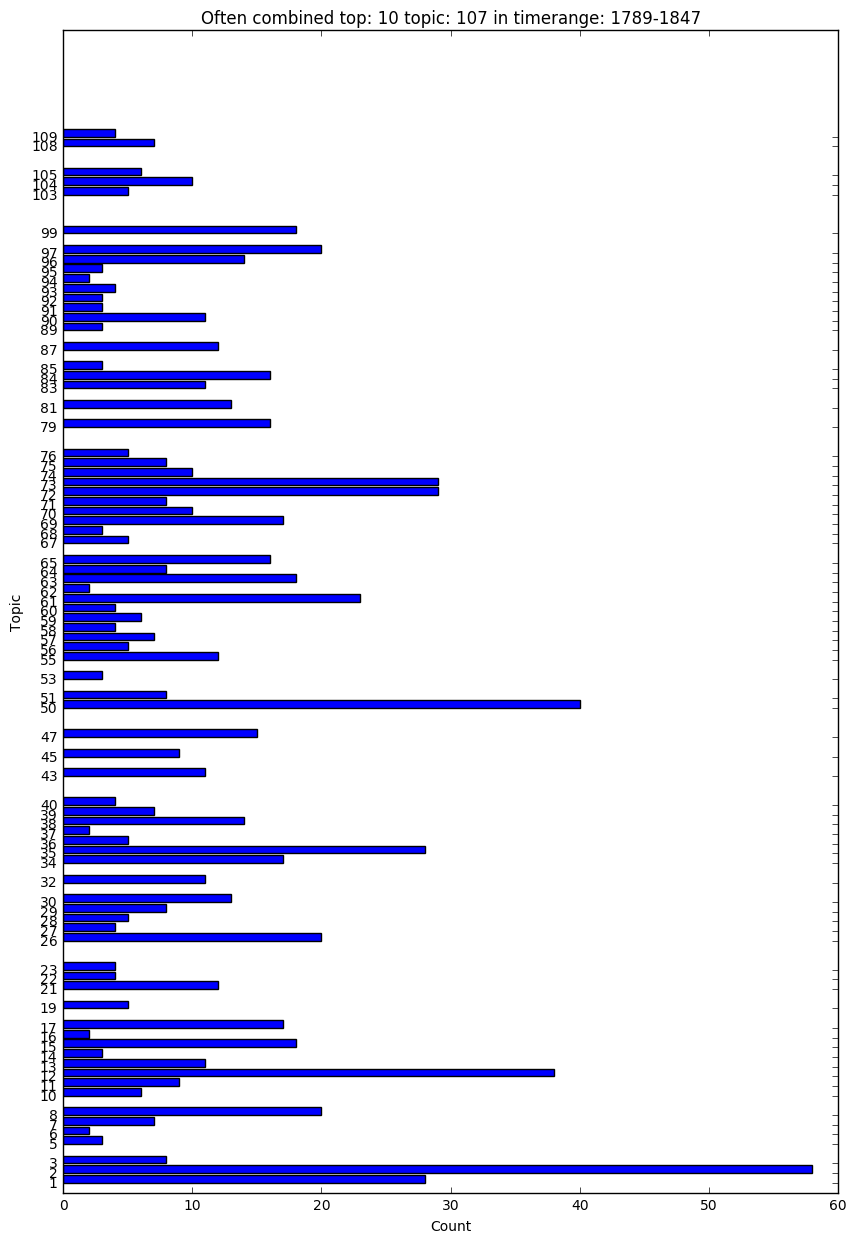

In [11]:
# matrix bar plot
def topic_plot(time_range_matrices, time_range, topic):
    
    mat_row = pd.DataFrame(time_range_matrices[time_range])[topic]
    data = mat_row.sort_values(ascending=False).reset_index()[0:80]
    data['indexstr'] = data['index'].astype(str)
    n = 10

    count = data[topic]
    y = data['index']

    fig = plt.figure(figsize=(10, 15))

    plt.barh(y, count)
    plt.yticks(y, data['indexstr'])
    plt.ylabel('Topic')
    plt.xlabel('Count')
    plt.title('Often combined top: ' + str(n)+ ' topic: ' + str(topic) + ' in timerange: '+ str(time_ranges[time_range][0]) + '-'+ str(time_ranges[time_range][1]))
    
    #plt.margins(0.2)
    #plt.subplots_adjust(bottom=0.15)
    #plt.set_xticklabels

    plt.show()
    
    
    
topic = 107

topic_plot(time_range_matrices, 0, topic)


In [10]:
mat_row2 = mat_row.sort_values(ascending=False).reset_index()[0:10]

mat_row2

NameError: name 'mat_row' is not defined

# deine mama 

In [ ]:
# p(cluster | Zeitraum,Nationalität )  absteigend geordnet

In [ ]:
# forall zeiträume forall nationalitäten
# query - eingrenzen auf zeitraum
# query eingerenzen auf nationalität
# cluster zählen


In [138]:
# matrices to table

# topic = 52

# topic_group, cluster_ids, cluster_names, "1789-1847", "1848-1874", "1875-1914"

#load Data!!!
import db

import json
with open('../data/topics_benannt.txt') as topic_word_json:
        topic_word_dic = json.load(topic_word_json)

my_db = db.Db()
df = my_db.final_cluster_nation
#cluster_names = 
time_ranges = [(1789,1847), (1848,1874), (1875,1914)]
countries = ['Germany', 'France', 'Britain']

#df = df[df['metadata_country']]
#b_df[b_df['mid_year'] >=]
n = 10
results = []
for country in countries:
    for from_, to in time_ranges:
        df2 = df.query('mid_year >= {0} and mid_year <= {1} & metadata_country == "{2}"'
                        .format(
                            from_,to,country
                        ))
        
        df_ = df2.groupby('cluster_id', as_index=False).count()
        df_['count'] = df_['picture_id']
        df_['epoch'] = str(from_) + '-' + str(to)
        df_['country'] = country
        df_['cluster_name'] = df_['cluster_id'].apply(lambda x: topic_word_dic[str(x)])
        df_['sum'] = df_['count'].sum()/4
        df_['count_rel'] = df_['count'] / df_['sum']
        
        res = df_[['cluster_id', 'count', 'count_rel', 'epoch', 'country', 'cluster_name']]

        results.append(res.sort_values('count', ascending=False)[:n])

final = pd.concat(results)
final = final.sort_values(['country','epoch','count'], ascending=False).reset_index(drop=True)

final.to_csv('top20topics_per_timerange_and_country', index=False)
        
final    


Db initialized, data is now accessible. It took  0.66s reading all files


,cluster_id,count,count_rel,epoch,country,cluster_name
0,66,239,0.144848,1875-1914,Germany,"Blauer Reiter, Expressionismus"
1,95,232,0.140606,1875-1914,Germany,Farben
2,107,173,0.104848,1875-1914,Germany,Fotografie
3,5,157,0.095152,1875-1914,Germany,"Zeichnung, Skizze"
4,3,155,0.093939,1875-1914,Germany,"Frau, nackt"
5,73,132,0.080000,1875-1914,Germany,"Verzierung, Ornament"
6,69,132,0.080000,1875-1914,Germany,Gesicht
7,51,127,0.076970,1875-1914,Germany,"Landschaft, Wiese"
8,11,122,0.073939,1875-1914,Germany,"Frau, weibliche Kleidung"
9,6,114,0.069091,1875-1914,Germany,Pferd


# Alt

In [31]:
#old

topics = range(0,110)
matrixAll = [None] * 110

for topicA in topics:
    #print(topicA)
    picture_id_with_topic = df[df['cluster_id']==topicA]['picture_id']
    #for topicB in 
    a = df[df['cluster_id'] != topicA]

    matrix= range(0,110)
    for x in matrix:
        matrix[x] = 0

    for pic_id in picture_id_with_topic:
        pictures = a[a['picture_id']== pic_id]
        for topic_id in pictures['cluster_id']:
            matrix[topic_id] = matrix[topic_id] +1

    matrixAll[topicA] = matrix

topic_martix_df = pd.DataFrame(matrixAll)

#topic_martix_df
#topic_martix_df.describe()
#topic_martix_df.as_matrix()


In [32]:
topic_martix_df

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0,3,12,23,45,21,28,19,2,6,...,84,0,2,5,7,45,5,7,5,123
1,3,0,3,1,4,43,1,7,96,1,...,0,46,3,100,119,9,1,146,3,1
2,12,3,0,6,4,173,5,21,14,1,...,5,1,2,4,2,12,2,156,2,8
3,23,1,6,0,9,136,31,28,27,320,...,1,0,34,9,115,16,4,22,13,44
4,45,4,4,9,0,9,9,4,1,3,...,41,0,4,0,3,23,7,19,5,109
5,21,43,173,136,9,0,56,109,29,40,...,5,8,5,37,90,13,5,7,12,18
6,28,1,5,31,9,56,0,18,1,7,...,2,0,7,9,1,23,4,23,5,8
7,19,7,21,28,4,109,18,0,7,18,...,35,2,5,3,28,25,5,42,2,23
8,2,96,14,27,1,29,1,7,0,19,...,2,18,7,43,74,1,8,107,10,6
9,6,1,1,320,3,40,7,18,19,0,...,0,2,19,3,77,9,1,12,5,20


/home/l/lemkec/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


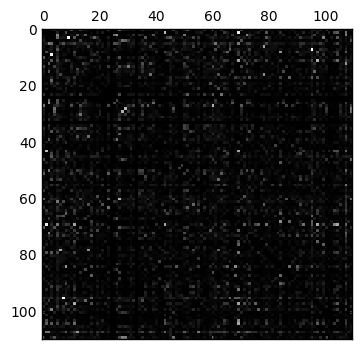

In [14]:
import matplotlib.pyplot as plt
import numpy as np



# Display a random matrix with a specified figure number and a grayscale
# colormap

fig = plt.figure(figsize=(11, 11))
plt.matshow(topic_martix_df.as_matrix(), fignum=100, cmap=plt.cm.gray)

fig.show()

In [185]:
topic_frequently_df.sort_values('count', ascending=False)[0:8]

,topic_id,name,count
9,9,"Frau, nackt, nah",366
99,99,"Skulptur, Statue",178
18,18,Badende,150
5,5,"Zeichnung, Skizze",141
11,11,"Frau, weibliche Kleidung",127
45,45,"Frauengruppe, Damen",127
79,79,Paar,125
104,104,"Hand, Finger",123


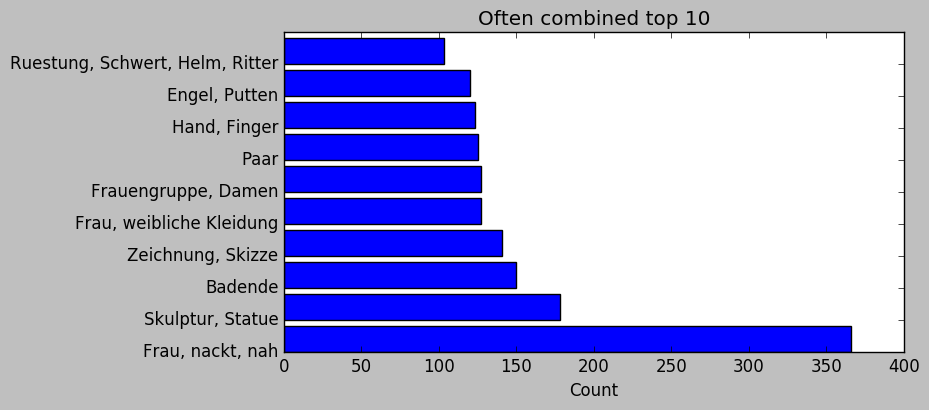

In [202]:

n = 10

df = topic_frequently_df.sort_values('count', ascending=False)[0:n]

topics= []*n

for i, x in enumerate(df['name']):
    topics.append( x)
    
y_pos = np.arange(len(topics))

count = df['count']

fig = plt.figure(figsize=(8, 4))
plt.barh(y_pos, count)
plt.yticks(y_pos, topics)
#plt.xlabel('Topic')
plt.xlabel('Count')
plt.title('Often combined top ' + str(n))
#plt.margins(0.2)
#plt.subplots_adjust(bottom=0.15)
#plt.set_xticklabels

plt.show()